In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()
    drop_cols = ["passengerid", "ticket", "cabin", "name"]
    df = df.drop(columns = drop_cols)
    return df
    

In [3]:
pathtr = "datasets/train.csv"
pathts = "datasets/test.csv"
df_train =  load_data(pathtr)
df_test = load_data(pathts)

In [4]:
print(df_train.shape)
print(df_test.shape)

(891, 8)
(418, 7)


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       332 non-null    float64
 3   sibsp     418 non-null    int64  
 4   parch     418 non-null    int64  
 5   fare      417 non-null    float64
 6   embarked  418 non

## Exploratory Data Analysis

In [6]:
df_train.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [7]:
df_test.isna().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [8]:
survival_counts = df_train['survived'].value_counts(normalize= True)

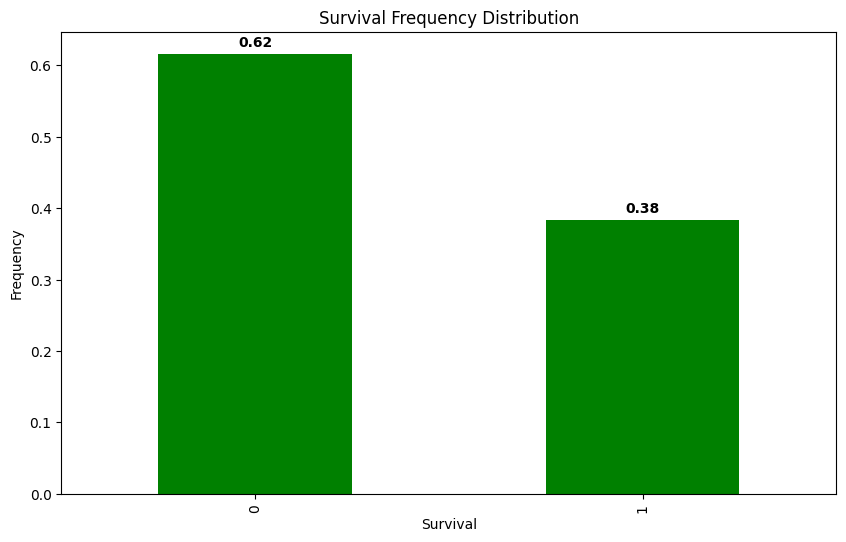

In [9]:
ax = survival_counts.plot(kind = "bar", color = "green", figsize = [10, 6])
# Annotate each bar with its value
for i, val in enumerate(survival_counts):
    ax.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.title("Survival Frequency Distribution")
plt.xlabel("Survival")
plt.ylabel("Frequency")
plt.show()

- It is noticed that the target variable is imbalanced

<Axes: xlabel='age', ylabel='Count'>

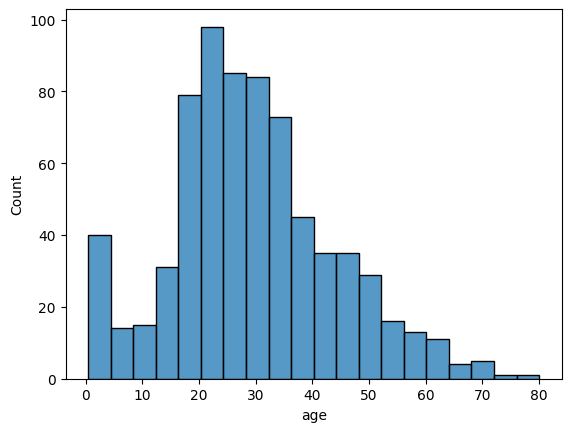

In [10]:
sns.histplot(data = df_train, x= "age")

In [11]:
# check the statistical data
df_train.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [12]:
print(df_train.groupby("pclass")["survived"].count())
print(df_train.loc[df_train["survived"] == 1].groupby("pclass")["survived"].count())
df_train.loc[df_train["survived"] == 1].groupby("pclass")["survived"].count()/df_train.groupby("pclass")["survived"].count()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64
pclass
1    136
2     87
3    119
Name: survived, dtype: int64


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [13]:
df_train.groupby("pclass")["survived"].count()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

<Axes: xlabel='fare', ylabel='Count'>

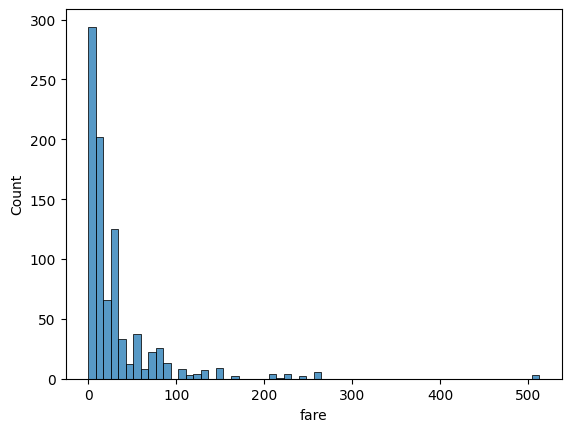

In [14]:
sns.histplot(
    data= df_train,
    x= "fare"
)

In [15]:
df_train[df_train["fare"] <1]

survived  pclass   sex   age  sibsp  parch  fare embarked
179         0       3  male  36.0      0      0   0.0        S
263         0       1  male  40.0      0      0   0.0        S
271         1       3  male  25.0      0      0   0.0        S
277         0       2  male   NaN      0      0   0.0        S
302         0       3  male  19.0      0      0   0.0        S
413         0       2  male   NaN      0      0   0.0        S
466         0       2  male   NaN      0      0   0.0        S
481         0       2  male   NaN      0      0   0.0        S
597         0       3  male  49.0      0      0   0.0        S
633         0       1  male   NaN      0      0   0.0        S
674         0       2  male   NaN      0      0   0.0        S
732         0       2  male   NaN      0      0   0.0        S
806         0       1  male  39.0      0      0   0.0        S
815         0       1  male   NaN      0      0   0.0        S
822         0       1  male  38.0      0      0   0.0        S

In [16]:
pd.set_option("display.max_rows", 100)
df_train[["pclass", "fare"]].sample(100)

pclass      fare
51        3    7.8000
206       3   15.8500
116       3    7.7500
484       1   91.0792
536       1   26.5500
455       3    7.8958
207       3   18.7875
837       3    8.0500
638       3   39.6875
158       3    8.6625
286       3    9.5000
364       3   15.5000
712       1   52.0000
886       2   13.0000
252       1   26.5500
7         3   21.0750
183       2   39.0000
579       3    7.9250
24        3   21.0750
383       1   52.0000
523       1   57.9792
217       2   27.0000
802       1  120.0000
574       3    8.0500
349       3    8.6625
144       2   11.5000
10        3   16.7000
46        3   15.5000
757       2   11.5000
302       3    0.0000
14        3    7.8542
87        3    8.0500
766       1   39.6000
243       3    7.1250
212       3    7.2500
671       1   52.0000
874       2   24.0000
111       3   14.4542
439       2   10.5000
114       3   14.4583
694       1   26.5500
370       1   55.4417
61        1   80.0000
473       2   13.7917
112       3    8.0500
229       3   25.4667
641       1   69.3000
500       3    8.6625
236       2   26.0000
209       1   31.0000
181       2   15.0500
91        3    7.8542
180       3   69.5500
496       1   78.2667
516       2   10.5000
247       2   14.5000
329       1   57.9792
550       1  110.8833
214       3    7.7500
402       3    9.8250
438       1  263.0000
374       3   21.0750
625       1   32.3208
856       1  164.8667
385       2   73.5000
602       1   42.4000
196       3    7.7500
284       1   26.0000
172       3   11.1333
19        3    7.2250
669       1   52.0000
613       3    7.7500
797       3    8.6833
246       3    7.7750
31        1  146.5208
167       3   27.9000
150       2   12.5250
821       3    8.6625
718       3   15.5000
203       3    7.2250
251       3   10.4625
756       3    7.7958
258       1  512.3292
176       3   25.4667
215       1  113.2750
522       3    7.2250
801       2   26.2500
417       2   13.0000
787       3   29.1250
168       1   25.9250
805       3    7.7750
97        1   63.3583
147       3   34.3750
295       1   27.7208
676       3    8.0500
204       3    8.0500
445       1   81.8583
121       3    8.0500
853       1   39.4000
687       3   10.1708

In [17]:
# group each passenger class by the median fare
df_train.groupby("pclass")['fare'].agg(
    mean = "mean",
    median = "median"
)

mean   median
pclass                    
1       84.154687  60.2875
2       20.662183  14.2500
3       13.675550   8.0500

In [18]:
df_train["fare"] = df_train["fare"].mask(
    df_train["fare"] == 0,  # condition
    df_train.groupby("pclass")["fare"].transform("median")  # fill with median per group
)

<Axes: xlabel='fare', ylabel='Count'>

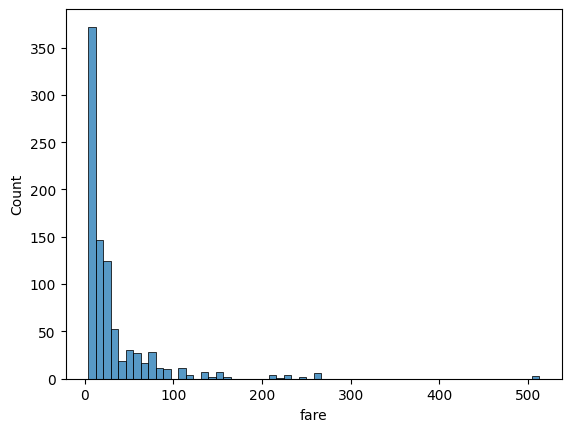

In [19]:
sns.histplot(
    data= df_train,
    x= "fare"
)

In [20]:
df_train.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

## Split the data

In [21]:
target = "survived"
X_train = df_train.drop(columns= target)
y_train = df_train[target]
X_test = df_test.copy()

In [22]:
num_features = X_train.select_dtypes(exclude="object")
num_features

pclass   age  sibsp  parch     fare
0         3  22.0      1      0   7.2500
1         1  38.0      1      0  71.2833
2         3  26.0      0      0   7.9250
3         1  35.0      1      0  53.1000
4         3  35.0      0      0   8.0500
..      ...   ...    ...    ...      ...
886       2  27.0      0      0  13.0000
887       1  19.0      0      0  30.0000
888       3   NaN      1      2  23.4500
889       1  26.0      0      0  30.0000
890       3  32.0      0      0   7.7500

[891 rows x 5 columns]

In [23]:
cat_features = X_train.select_dtypes(include="object")
cat_features

sex embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]

In [24]:
num_feats = list(num_features)
cat_feats = list(cat_features)
print(num_feats)
print(cat_feats)

['pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked']


In [25]:
num_pipeline = Pipeline(
    [
    ("imputer", SimpleImputer(strategy= "mean")),
    ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
    ("imputer", SimpleImputer(strategy= 'most_frequent')),
    ("encoder", OneHotEncoder(sparse_output= False))
    ]
)


full_pipeline = ColumnTransformer(
    [
        ("num_features", num_pipeline, num_feats),
        ("cat_features", cat_pipeline, cat_feats)
    ]
    
)

In [26]:
# transform train and test datasets
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

## Linear Classifier Model

In [27]:
lc_clf = LogisticRegression(random_state= 42)
params = {
    "solver": ['lbfgs', 'sag', 'saga'],
    "penalty": [None, "l2"]
}

In [28]:
gridsearch = GridSearchCV(
    lc_clf,
    param_grid= params,
    cv= 5,
    n_jobs= 2,
    scoring= "f1_weighted"
)

In [29]:
gridsearch.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'penalty': [None, 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='f1_weighted')

In [30]:
gridsearch.best_score_

np.float64(0.7864846482610822)

## SVC

In [31]:
from sklearn.svm import SVC

In [32]:
svc_clf = SVC(random_state= 42)

In [33]:
params = {
    "gamma": ["scale", "auto"],
    "kernel": ["rbf", "sigmoid", "poly"],
    "C": [0.3, 0.5, 0.7, 1.0]
}

gridsearch_svc = GridSearchCV(
    svc_clf,
    param_grid= params,
    n_jobs=2,
    cv= 5,
    scoring="f1_weighted",
    return_train_score= True
    
)

In [34]:
gridsearch_svc.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=2,
             param_grid={'C': [0.3, 0.5, 0.7, 1.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             return_train_score=True, scoring='f1_weighted')

In [35]:
gridsearch_svc.best_score_

np.float64(0.8256575904054297)

In [37]:
gridsearch_svc = GridSearchCV(
    svc_clf,
    param_grid= params,
    n_jobs=2,
    cv= 5,
    scoring="accuracy",
    return_train_score= True
    
)
gridsearch_svc.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=2,
             param_grid={'C': [0.3, 0.5, 0.7, 1.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             return_train_score=True, scoring='accuracy')

In [38]:
gridsearch_svc.best_score_

np.float64(0.8282844768062269)

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_clf = RandomForestClassifier(random_state=42)

In [41]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(2,20,2),
    "max_features": ["sqrt", "log2", None],
    "n_estimators": np.arange(1, 40, 5)
}

gridsearch_rf = GridSearchCV(
    rf_clf,
    param_grid= params,
    n_jobs=2,
    cv= 5,
    scoring="accuracy",
    return_train_score= True
    
)
gridsearch_rf.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36])},
             return_train_score=True, scoring='accuracy')

In [42]:
gridsearch_rf.best_score_

np.float64(0.8417676228736426)

In [43]:
model = gridsearch_rf.best_estimator_

In [44]:
model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [45]:
gridsearch_rf.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(8),
 'max_features': None,
 'n_estimators': np.int64(26)}

In [46]:
model_rf = RandomForestClassifier(
    n_estimators= 11,
    max_depth= 10,
    max_features= None,
    criterion= "entropy"
)

In [47]:
y_test_pred = gridsearch_rf.best_estimator_.predict(X_test_tr)

In [48]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
df_test

pclass     sex   age  sibsp  parch      fare embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male   NaN      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male   NaN      0      0    8.0500        S
417       3    male   NaN      1      1   22.3583        C

[418 rows x 7 columns]

In [50]:
output = pd.DataFrame({
    "PassengerId":  range(892, 892 + len(y_test_pred)),
    "Survived": y_test_pred
})
output

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [51]:
output.to_csv("submission.csv", index= False)

## Extract importances

In [61]:
importances = gridsearch_rf.best_estimator_.feature_importances_
print(importances)

0.130607140253429


In [65]:
cat_features_out = full_pipeline.named_transformers_["cat_features"] \
    .named_steps["encoder"] \
    .get_feature_names_out(cat_feats)

# Combine
all_features = list(num_feats) + list(cat_features_out)
print(all_features)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']


In [66]:
feature_names = all_features

importances = gridsearch_rf.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance_df)

      feature  importance
6    sex_male    0.204800
4        fare    0.200124
1         age    0.189560
5  sex_female    0.176121
0      pclass    0.130607
2       sibsp    0.048354
3       parch    0.021921
9  embarked_S    0.013877
7  embarked_C    0.009801
8  embarked_Q    0.004836


<Figure size 1200x800 with 0 Axes>

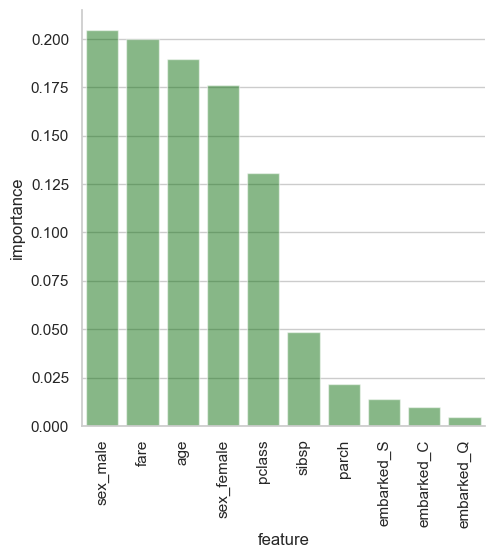

<Figure size 640x480 with 0 Axes>

In [74]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12, 8])
sns.catplot(
    kind="bar",
    data = feature_importance_df,
    x = "feature",
    y = "importance",
    color= "green",
    alpha = .5
)
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()